# FOREWORD FOR FOLLOWING CODE SECTIONS
    
### While creating this code was the first half of our project, the results ultimately were void as we discovered that our activity parameter (given to variants of our original catalyst) was, in fact, not supported by literature, leading us to shift the direction of the project. 
### As this section did not lead to the final conclusions of our study, the following code is given in bulk, with less labels than the following code section (Part 2 code). Graphs leading to our shift in direction to magnetic properties of catalysts are labeled.

## Basis of This Portion of the Project
### With an extensive list of functions for searching, labeling, and graphing, the premise of 1st Part of this project was to explore trends among properties of materials as well as different classes of materials. A user_friendly search and label system (built from the aforementioned functions) and highly adaptable graphing visulization of data, allowed for a substantial variety of compounds to be explored; ultimately FeO yielded the most interesting trends

### **You must enter an api_key from Materials Project Database (MPD) below for the code to work

In [1]:
# Accesing the API and loading packages
import pymatgen as pmg
from pymatgen import MPRester
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from operator import *
from itertools import combinations as combo
from scipy import stats
api_key= "enter key here" # <--- your key in the blank 
mpr = pmg.MPRester(api_key)

#preparting dataframe and seaborn settings
pd.set_option('display.max_rows', None)
sns.set()
sns.set_theme()

### The following code is meant to display how the catalyst list of materials was created

In [17]:
#Functions:

#Importing dataframe and turning it into a catalyst activity list
read_df = pd.read_excel(r'part1data.xlsx')
cat_act = list(read_df.T.to_dict().values())


# all definitions
def Merge(dict1, dict2):
    merged = [*dict1, *dict2]
    return merged

#adding in activities for all new materials and crossreferencing to check if they're a subgroup 
def append_act(material, cat_act, sign = sub):
    
    for i in material:
        for j in cat_act:
            if j['pretty_formula'] in i['pretty_formula']:
                i['subgroup'] = 'yes'
                if i['activity'] == 0:
                    i['activity'] = sign(0,j['activity'])
                    #new materials will have negative of our original list
                    
    return material

def append_class(name, criteria, material):
    
    properties = ['pretty_formula','energy', 'energy_per_atom', 'nsites', 'e_above_hull', 'space_group', 'band_gap', 'total_magnetization','oxide_type', 'elasticity']
    new_list = MPRester(api_key).query(criteria, properties)
    
    for i in range(0, len(new_list)):
        new_list[i]["type"] = name
        new_list[i]["activity"] = 0
        new_list[i]["subgroup"] = 'no'
        
    append_act(new_list, cat_act) #sign automatically minus for new elements only need to specify for old ones to be plus
    material = Merge(material, new_list)
    
    return material

In [3]:
#Generating OG list of materials
cat= [ "Pt" , "RuO3" , "Re", "Pd", "Rh", "Ir", "IrO3", "MoS2", "Cu", "NiCeO2", "NiFeO2", "Co", "Au", "W", "Ag", "Mo", "Nb", "Fe"]

material=[] 

for mat in cat:
    criteria=mat
    properties=['pretty_formula','energy', 'energy_per_atom', 'nsites', 'e_above_hull', 'space_group', 'band_gap', 'total_magnetization','oxide_type', 'elasticity']
    find=MPRester(api_key).query(criteria,properties)
    for element in range(0,len(find)):
        material.append(find[element])
        
for i in range(0, len(material)):
        material[i]["type"] = "orig" 
        material[i]["activity"] = 0 

append_act(material, cat_act, add)

#have to reset all subgroups to original b/c append_act wipes it
for j in range(0, len(material)):
        material[j]["subgroup"] = "original" 

In [12]:
#adding oxides and arsenides to potential catalyst list

w_oxides=append_class('oxides',{"elements":{"$in":cat, "$all": ["O"]}, "nelements":2},material)
full_list=append_class('arsenides',{"elements":{"$in": cat ,"$all":["As"]},"nelements":2},w_oxides)
full_df=pd.DataFrame(full_list)
print("Example Dataframe of Catalyst Material Search. Materials Graphed Below")
print("amount of materials: "+str(len(full_list)))
display(full_df)

Example Dataframe of Catalyst Material Search. Materials Graphed Below
amount of materials: 638


,pretty_formula,energy,energy_per_atom,nsites,e_above_hull,space_group,band_gap,total_magnetization,oxide_type,elasticity,type,activity,subgroup
0,Pt,-6.070908,-6.070908,1,0.000000,None,0.0000,5.143530e-02,None,"{'G_Reuss': 48.0, 'G_VRH': 49.0, 'G_Voigt': 49...",orig,18,original
1,Re,-37.278075,-12.426025,3,0.018502,None,0.0000,5.601667e-04,None,"{'G_Reuss': 165.0, 'G_VRH': 167.0, 'G_Voigt': ...",orig,17,original
2,Re,-24.889054,-12.444527,2,0.000000,None,0.0000,6.480000e-05,None,"{'G_Reuss': 171.0, 'G_VRH': 173.0, 'G_Voigt': ...",orig,17,original
3,Re,-12.381770,-12.381770,1,0.062757,None,0.0000,3.437000e-04,None,"{'G_Reuss': 183.0, 'G_VRH': 186.0, 'G_Voigt': ...",orig,17,original
4,Re,-49.772496,-12.443124,4,0.001403,None,0.0000,8.391250e-04,None,None,orig,17,original
5,Pd,-20.692643,-5.173161,4,0.006721,None,0.0000,8.565750e-04,None,None,orig,16,original
6,Pd,-5.179882,-5.179882,1,0.000000,None,0.0000,4.002472e-01,None,"{'G_Reuss': 35.0, 'G_VRH': 43.0, 'G_Voigt': 50...",orig,16,original
7,Rh,-7.364308,-7.364308,1,0.000000,None,0.0000,6.472100e-03,None,"{'G_Reuss': 141.0, 'G_VRH': 145.0, 'G_Voigt': ...",orig,15,original
8,Rh,-13.143603,-6.571801,2,0.792506,None,0.0000,4.047100e-03,None,None,orig,15,original
9,Rh,-29.297563,-7.324391,4,0.039917,None,0.0000,7.333533e-02,None,None,orig,15,original


### Plot below led to the discovery that only FeO materials fit the trend. Clearly no materials with "optimal" activity (with large magnitude for activity) were seen on the linear trend, urging a change in direction for this project. 

#### *all materials fitting trend are light blue with a poor activity rating of -2. Activity is an arbitrary value created to predict current densities of new compounds- did not result in conclusive findings

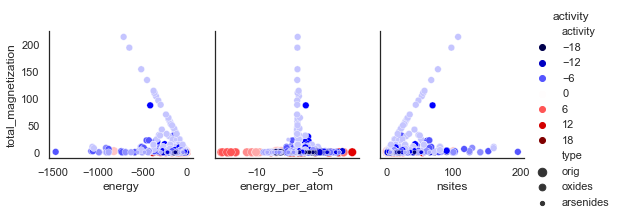

In [11]:
x_vars = ['energy', 'energy_per_atom', 'nsites']
y_vars = ['total_magnetization']
g=sns.PairGrid(full_df, hue= "activity", palette="seismic", x_vars=x_vars, y_vars=y_vars)
g.map(sns.scatterplot, size=full_df["type"])
g.add_legend()

## Examples of Different Graphs Used for Data Visualization
### Pairplot/Pairgrid used to compare properties and allowed for a broad view of our data that could then be narrowed down

Text(0.5, 0.98, 'Pairplot With Activity')

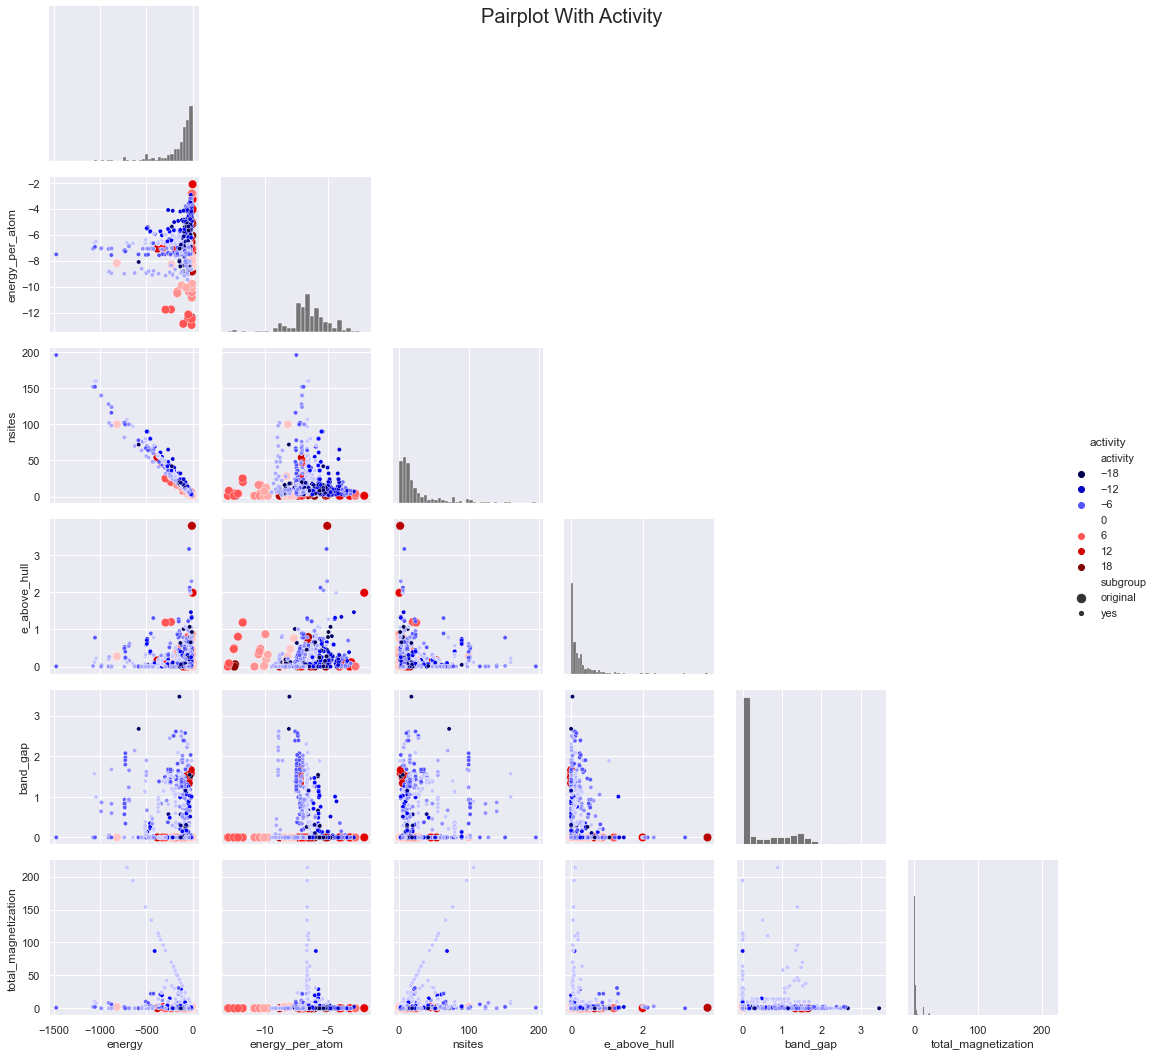

In [6]:
#large pairplot with specs
variables = ['energy', 'energy_per_atom', 'nsites', 'e_above_hull', 'band_gap', 'total_magnetization']
g=sns.PairGrid(data=full_df, hue= "activity", palette="seismic", vars=variables, corner = True)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot, size=full_df['subgroup'])
g.add_legend()
g.fig.suptitle('Pairplot With Activity', size = 20)

Text(0.5, 0.88, 'Pairplot With Heatmap')

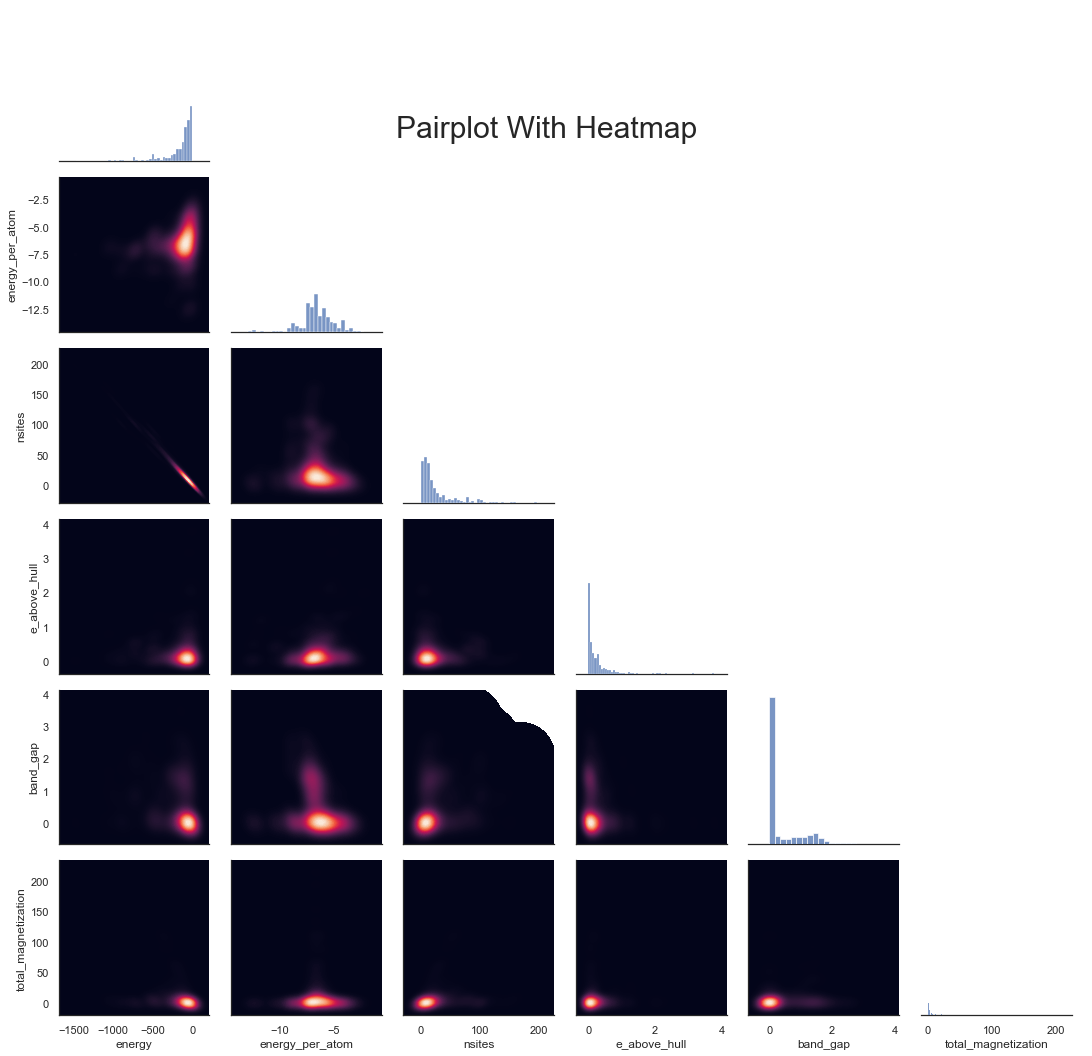

In [8]:
#Ker dens plot with corner
variables = ['energy', 'energy_per_atom', 'nsites', 'e_above_hull', 'band_gap', 'total_magnetization']
sns.set_style("white")
g=sns.PairGrid(data=full_df, corner= True, vars=variables) 
g.map_diag(sns.histplot)
g.map_offdiag(sns.kdeplot, fill=True, levels=100, thresh=0, cmap="rocket")
g.add_legend()
g.fig.suptitle('Pairplot With Heatmap', y = 0.88, fontsize = 30)

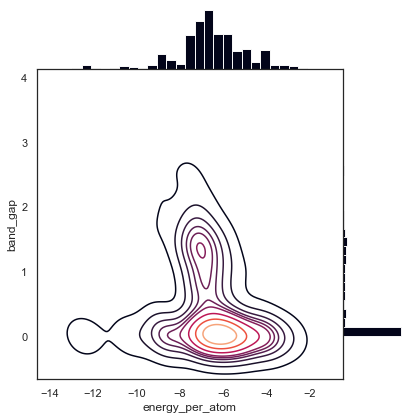

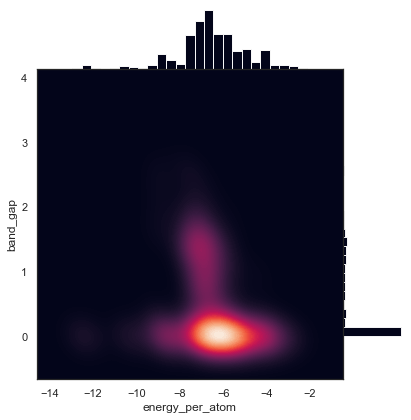

In [10]:
sns.set_theme(style="white")

g = sns.JointGrid(data=full_df, x="energy_per_atom", y="band_gap", space=0)
g.plot_joint(sns.kdeplot, cmap="rocket")
#g.plot_joint(sns.scatterplot) 
    #optional- gives points
    #fill in ker dens with fill=True, thresh=0, levels=100
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

sns.set_theme(style="white")

g = sns.JointGrid(data=full_df, x="energy_per_atom", y="band_gap", space=0)
g.plot_joint(sns.kdeplot, fill=True, levels=100, thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

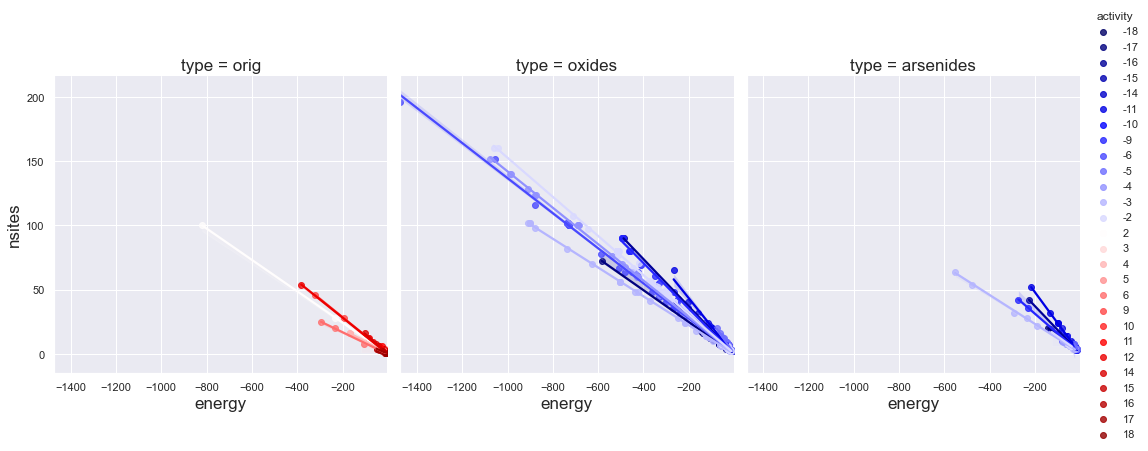

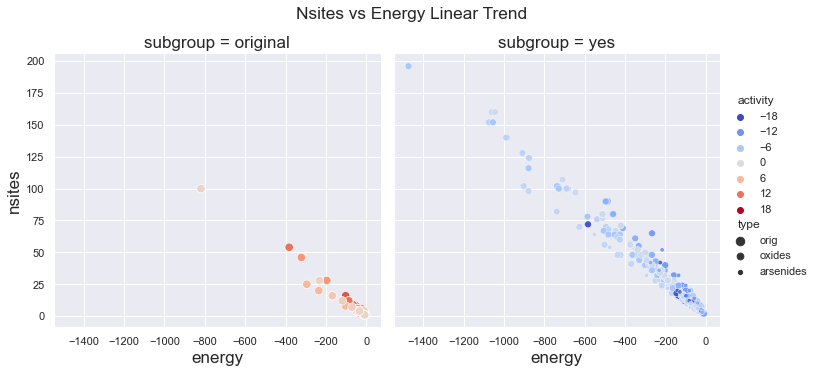

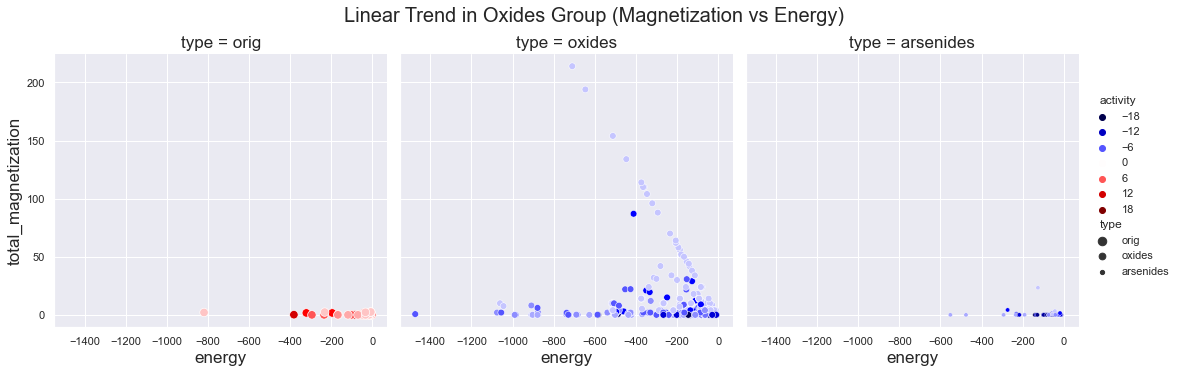

In [14]:
sns.set_style("darkgrid")
sns.set( rc = {'axes.labelsize' : 17 })
sns.lmplot(data=full_df,  x="energy", y="nsites", hue= "activity", col= "type", palette="seismic")
g = sns.relplot(data=full_df,  x="energy", y="nsites", hue= "activity", col= "subgroup", size="type", palette="coolwarm")
g.fig.suptitle("Nsites vs Energy Linear Trend", fontsize = 'x-large')
g.fig.subplots_adjust( top = 0.85 )
plt.show()
h = sns.relplot(data=full_df,  x="energy", y="total_magnetization", hue= "activity", col= "type", size="type", palette="seismic")
h.fig.suptitle("Linear Trend in Oxides Group (Magnetization vs Energy)", fontsize = 20)
h.fig.subplots_adjust( top = 0.85 )
plt.show()


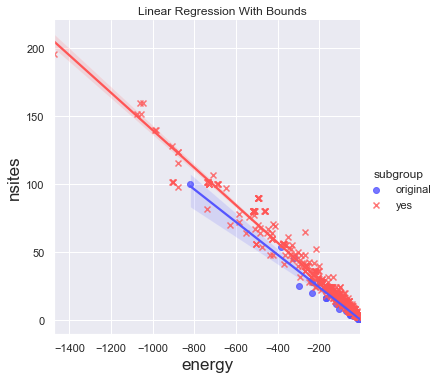

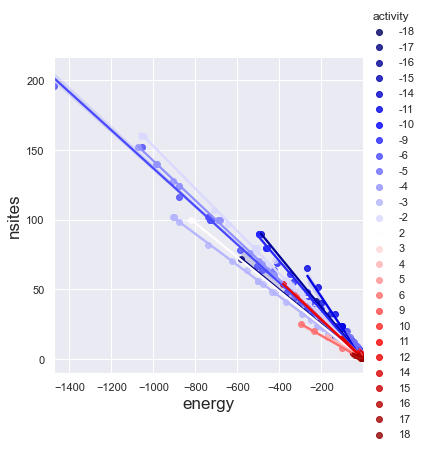

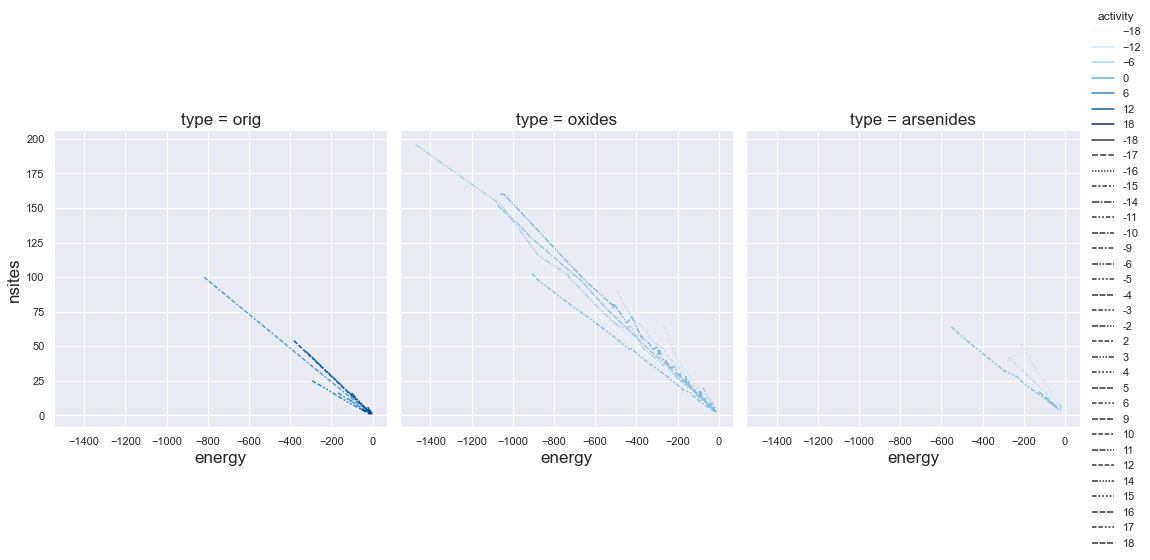

In [15]:
sns.set_style("darkgrid")
lm = sns.lmplot(data=full_df,  x="energy", y="nsites", hue= "subgroup", markers=["o","x"], palette="seismic")

# Access the figure
fig = lm.fig 

# Add a title to the Figure
fig.suptitle("Linear Regression With Bounds", fontsize=12, y = 1)

sns.lmplot(data=full_df,  x="energy", y="nsites", hue= "activity", palette="seismic")
sns.relplot(data=full_df, kind="line", x="energy", y="nsites", col= "type", hue= "activity", style="activity", palette="Blues")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy_per_Atom Density')

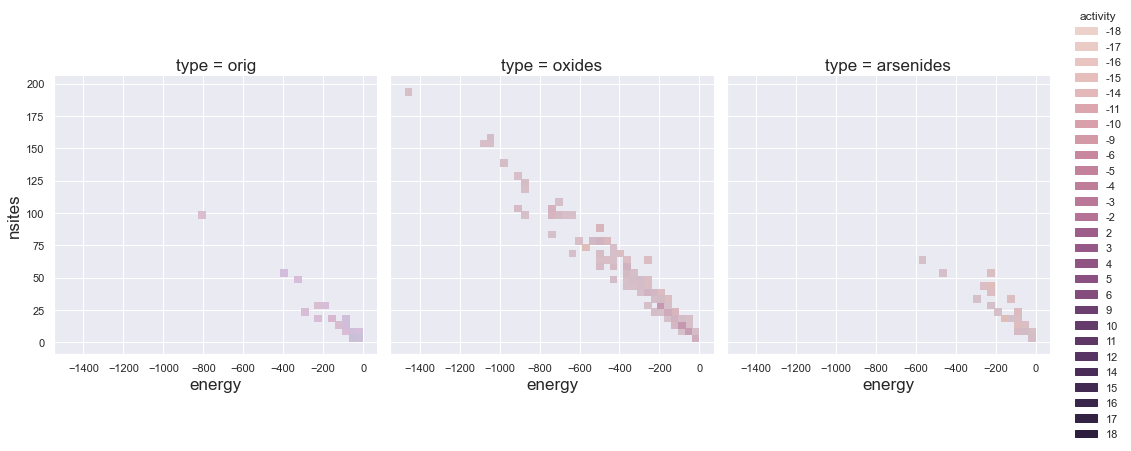

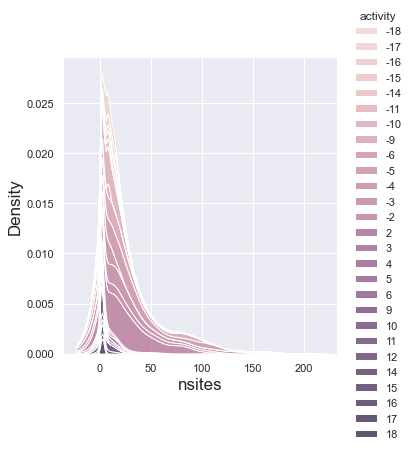

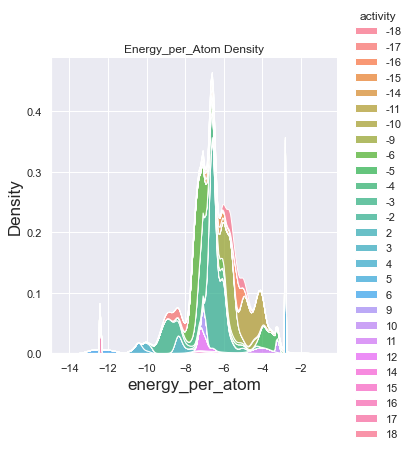

In [16]:
sns.displot(data=full_df, x="energy", y="nsites", col= "type", hue= "activity")
sns.displot(data=full_df, x="nsites", hue="activity", multiple="stack", kind="kde")
sns.color_palette("husl", 9)
sns.displot(data=full_df, x="energy_per_atom", hue="activity", multiple="stack", kind="kde", palette= "husl")
plt.title("Energy_per_Atom Density")

['energy', 'energy_per_atom', 'nsites', 'e_above_hull', 'space_group', 'band_gap', 'total_magnetization', 'oxide_type', 'elasticity']


TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

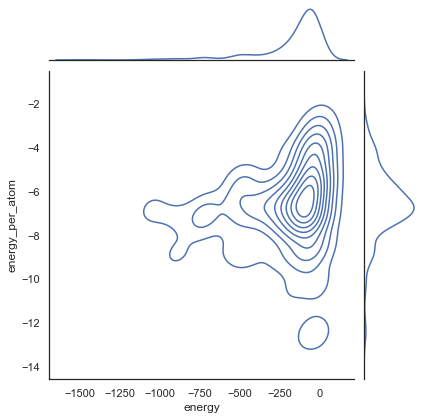

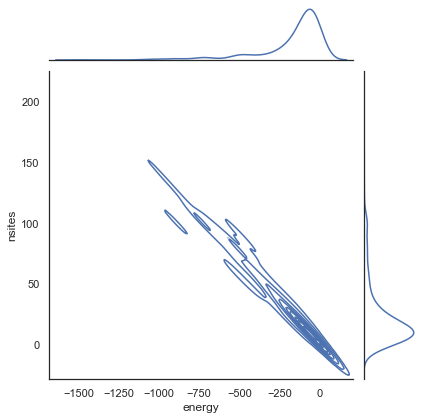

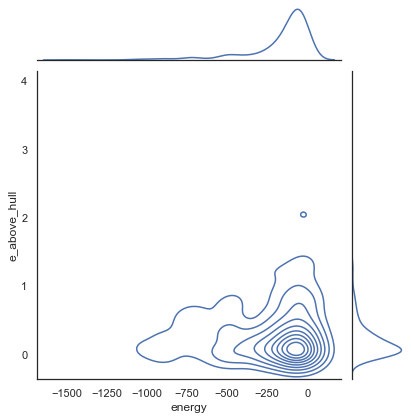

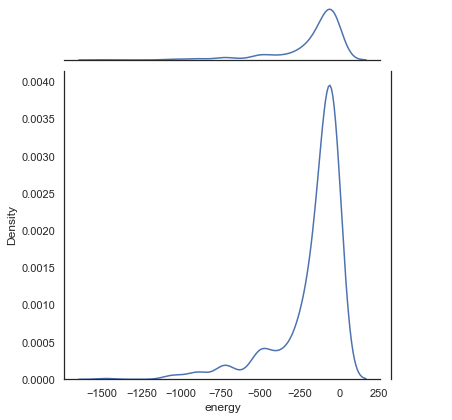

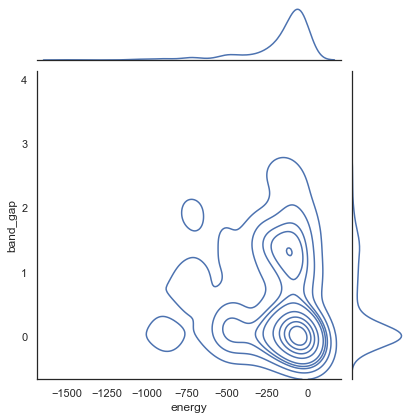

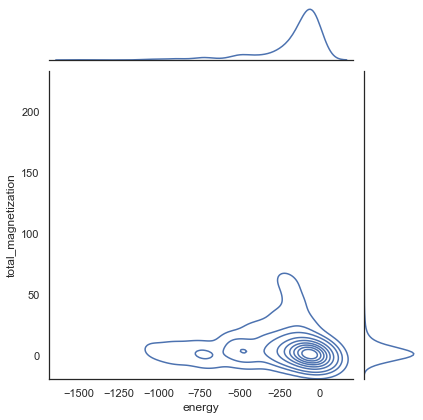

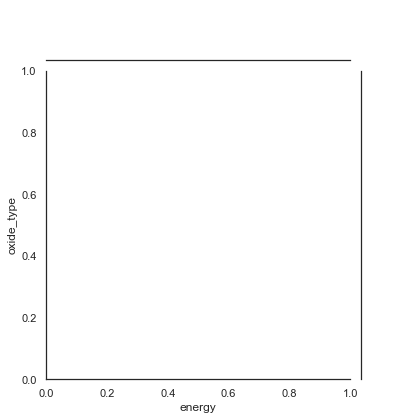

In [13]:
prop_new=[]
for i in properties:
    if i!="pretty_formula":
        prop_new.append(i)
print(prop_new)

prop_combo=list(combo(prop_new,2))
for i in range(len((prop_combo))):
    sns.jointplot(data=full_df, x=prop_combo[i][0], y=prop_combo[i][1], kind="kde", palette="cubehelix")